In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt 
df=pd.read_csv("pegaexample.csv")
sx=MinMaxScaler()
sy=MinMaxScaler()

X=df[['Total Purchases (X1)', 'Average Purchase Value (X2)','Customer Tenure (X3)']]
Y=df[['Customer Lifetime Value (Y)']]
scaledX=sx.fit_transform(X)
scaledY=sy.fit_transform(Y)

def batch_gradient_descent(X,y, epochs, learning_rate=0.01):
    
    number_of_features=X.shape[1] #getting the number of columns, exclusing the result column
    w=np.ones(shape=number_of_features) # getting the weights for the number of features , which should be equal to the number of features that tthere are
    b=0 #bias
    total_samples=X.shape[0]
    costlist=[]
    epochlist=[]
    for i in range(0, epochs):
        y_pred=np.dot(w, scaledX.T)+b # can visualize by writing 
        w_grad = -(2/total_samples)*(X.T.dot(y-y_pred))
        b_grad = -(2/total_samples)*np.sum(y-y_pred)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.mean(np.square((y-y_pred)))#cost is also the mse
        if i%100==0:
            costlist.append(cost)
            epochlist.append(i)

    return w, b, cost, costlist, epochlist

w, b, cost, costlist, epochlist = batch_gradient_descent(scaledX,scaledY.reshape(scaledY.shape[0],),5000)


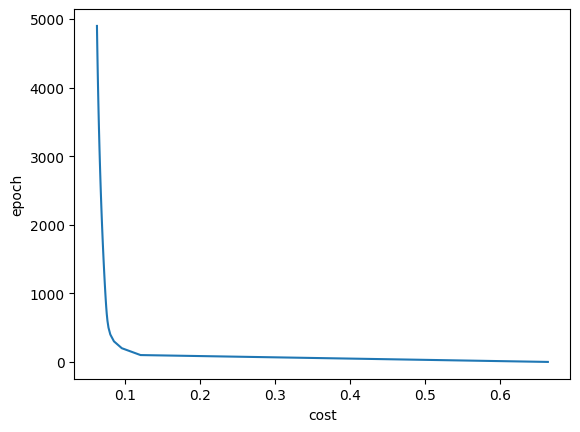

In [5]:
plt.xlabel("cost")
plt.ylabel("epoch")
plt.plot(costlist, epochlist)

In [7]:
def predict(tot_purchase_qty, avg_purchase_val, customer_tenure, w, b):
    scaled_input=sx.transform([[tot_purchase_qty, avg_purchase_val,customer_tenure]])[0]
    scaled_price=w[0]*scaled_input[0]+w[1]*scaled_input[1]+w[2]*scaled_input[2]+b;
    inverse_scaled_price = sy.inverse_transform([[scaled_price]])[0][0]
    return inverse_scaled_price

predict(10,66,30,w,b)

C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


832.7711511801618

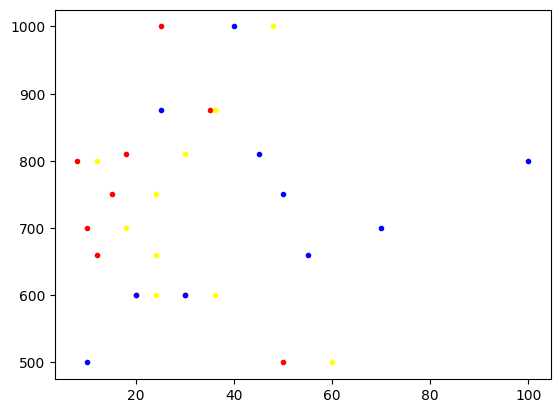

In [21]:
plt.scatter(X["Total Purchases (X1)"], Y, color='red', marker='.')
plt.scatter(X["Average Purchase Value (X2)"], Y, color='blue', marker='.')
plt.scatter(X["Customer Tenure (X3)"], Y, color='yellow', marker='.')


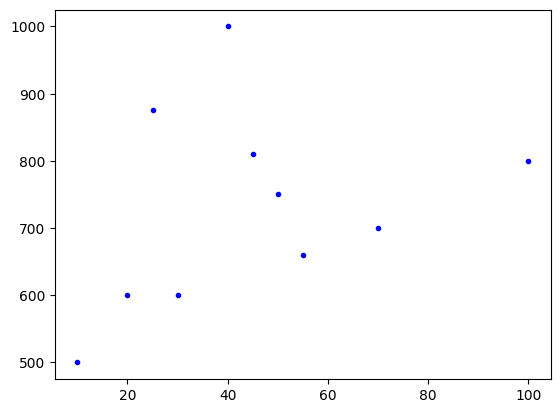

In [20]:
plt.scatter(X["Average Purchase Value (X2)"], Y, color='blue', marker='.')